# Analyse des données - TABLE S6 JTEX

L'objectif de cette étude préalable est de déterminer la corrélation ou non entre les variables afin de réaliser potentiellement une réduction de dimension pour le modèle SSB.

## Récupération des données S6 JTEX

In [9]:
import os
import matplotlib.pyplot as plt
from casys import CasysPlot, DateHandler, Field, NadirData, PlotParams
from casys.readers import CLSTableReader, MultiReader

In [10]:
# Variable d'environnement contenant les tables
ges_table_dir = "/data/SSB_ETU/S6JTEX/DSC"
os.environ["GES_TABLE_DIR"] = ges_table_dir

os.environ["OCE_DATA"] = "/data/SUPPORT/DONNEES/"

# Tables
table_lr = CLSTableReader(name="TABLE_C_S6A_LR_B")  # Table S6 LR​
table_lr_enrichie = CLSTableReader(
    name="TABLE_C_S6A_LR_B_S6JTEX"
)  # Table LR annexe enrichie par des données modèle ERA5 et Mercator
table_hr = CLSTableReader(name="TABLE_C_S6A_HR_B")  # Table S6 HR
table_hr_enrichie = CLSTableReader(
    name="TABLE_C_S6A_HR_B_S6JTEX"
)  # Table HR annexe enrichie par des données modèle ERA5 et Mercator

In [11]:
# Nom de l'orbit file
ORF = "C_S6A_LR_ORF"

# Période : Cycle 42 à Cycle 79 (= Totalité de l’année 2022) ​
start = DateHandler.from_orf(orf=ORF, cycle_nb=42, pass_nb=73, pos="first")
end = DateHandler.from_orf(orf=ORF, cycle_nb=79, pass_nb=23, pos="last")

print("Period start :", start)
print("Period end :", end)

Period start : 2022-01-01 00:38:20
Period end : 2022-12-31 23:49:14


In [12]:
# Création d'un objet NadirData décrivant les données ciblées
ad = NadirData(
    source=MultiReader(
        readers=[table_lr_enrichie, table_hr_enrichie],
        markers=["LR_", "HR_"],
        date_start=start,
        date_end=end,
        orf=ORF,
        select_clip="LR_FLAG_VAL.ALTI:==0",  # Sélection des données valides
        time="time",
        longitude="LONGITUDE",
        latitude="LATITUDE",
    )
)

In [13]:
ad.show_fields()

Name,Description,Unit
LR_ATMOSPHERIC_ATTENUATION_SIGMA0.ALTI,Atténuation atmosphérique du coefficient de rétrodiffusion en bande principale,dB
LR_ATMOSPHERIC_ATTENUATION_SIGMA0.ALTI.B2,Atténuation atmosphérique du coefficient de rétrodiffusion en bande secondaire,dB
LR_BATHYMETRY.MODEL,Ocean depth or land elevation,m
LR_BF_FLUCTUATIONS_CORRECTION.MODEL,Inverse barometric height correction,m
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL01,"Radiometer main beam brightness temperature measurements, channel 1.",K
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL01_SMOOTH,"Radiometer equalized brightness temperature measurements, channel 1. Values are smoothed (along-track averaging)",K
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL02,"Radiometer main beam brightness temperature measurements, channel 2.",K
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL02_SMOOTH,"Radiometer equalized brightness temperature measurements, channel 2. Values are smoothed (along-track averaging)",K
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL03,"Radiometer main beam brightness temperature measurements, channel 3.",K
LR_BRIGHTNESS_TEMPERATURE.RAD.CHANNEL03_SMOOTH,"Radiometer aqualized brightness temperature measurements, channel 3. Values are smoothed (along-track averaging)",K


In [14]:
# Champs utiles

# Test 1
#swh_alti = Field(name="SWH_Alti", source="HR_SWH.ALTI")
#ws_alti = Field(name="Wind_Speed_Alti", source="HR_WIND_SPEED.ALTI")

# Test 2
#swh_model = Field(name="SWH_Model", source="LR_SWH_ERA5")
#ws_model = Field(name="Wind_Speed_Model", source="LR_WIND_SPEED_ERA5")

# Test 3
swh_alti = Field(name="SWH_Alti", source="LR_SWH.ALTI")
ws_alti = Field(name="Wind_Speed_Alti", source="LR_WIND_SPEED.ALTI")

mean_wave_period = Field(
    name="Mean_Wave_Period", source="HR_MEAN_WAVE_PERIOD.MODEL.MFWAM"
)
stokes_drift_sat = Field(
    name="Stokes_Drifts_prof_on_Satellite_Direction",
    source="LR_VELOCITY_STOKES_DRIFT_PROJ_ERA5",
)
orbital_velocity_std = Field(
    name="Orbital_velocity_std", source="LR_ORBITAL_VELOCITY_STD"
)

ssh_anom = Field(
    name="SSH_anomaly_corrected_ssb",
    source="HR_SEA_SURFACE_HEIGHT_ANOMALY.ALTI",
)
ssh_anom_uncorr = Field(
    name="SSH_anomaly_uncorrected_ssb",
    source="HR_SEA_SURFACE_HEIGHT_ANOMALY_UNCORR_SSB.ALTI",
)

In [15]:
# Ajout de données à l'objet nadir

# Test 1 et 3
ad.add_raw_data(name="SWH_Alti", field=swh_alti)
ad.add_raw_data(name="Wind_Speed_Alti", field=ws_alti)

# Test 2
#ad.add_raw_data(name="SWH_Model", field=swh_model)
#ad.add_raw_data(name="Wind_Speed_Model", field=ws_model)

ad.add_raw_data(name="Mean_Wave_Period", field=mean_wave_period)
ad.add_raw_data(
    name="Stokes_Drifts_prof_on_Satellite_Direction", field=stokes_drift_sat
)
ad.add_raw_data(name="Orbital_velocity_std", field=orbital_velocity_std)
ad.add_raw_data(name="SSH_anomaly_corrected_ssb", field=ssh_anom)
ad.add_raw_data(name="SSH_anomaly_uncorrected_ssb", field=ssh_anom_uncorr)

In [16]:
ad.compute()
ad.data

<xarray.Dataset> Size: 2GB
Dimensions:                                    (time: 19664360)
Coordinates:
  * time                                       (time) datetime64[ns] 157MB 20...
Data variables:
    LONGITUDE                                  (time) float64 157MB 77.98 ......
    LATITUDE                                   (time) float64 157MB -66.14 .....
    SSH_anomaly_uncorrected_ssb                (time) float64 157MB -0.0665 ....
    SSH_anomaly_corrected_ssb                  (time) float64 157MB -0.0433 ....
    Orbital_velocity_std                       (time) float64 157MB 0.06614 ....
    Stokes_Drifts_prof_on_Satellite_Direction  (time) float64 157MB 0.01105 ....
    Mean_Wave_Period                           (time) float64 157MB 7.224 ......
    Wind_Speed_Alti                            (time) float64 157MB 1.3 ... 1...
    SWH_Alti                                   (time) float64 157MB 0.803 ......

In [17]:
ad.data.SWH_Alti

<xarray.DataArray 'SWH_Alti' (time: 19664360)> Size: 157MB
array([0.803, 0.932, 0.748, ..., 1.389, 1.352, 0.923])
Coordinates:
  * time     (time) datetime64[ns] 157MB 2022-01-01T00:38:31 ... 2022-12-31T2...

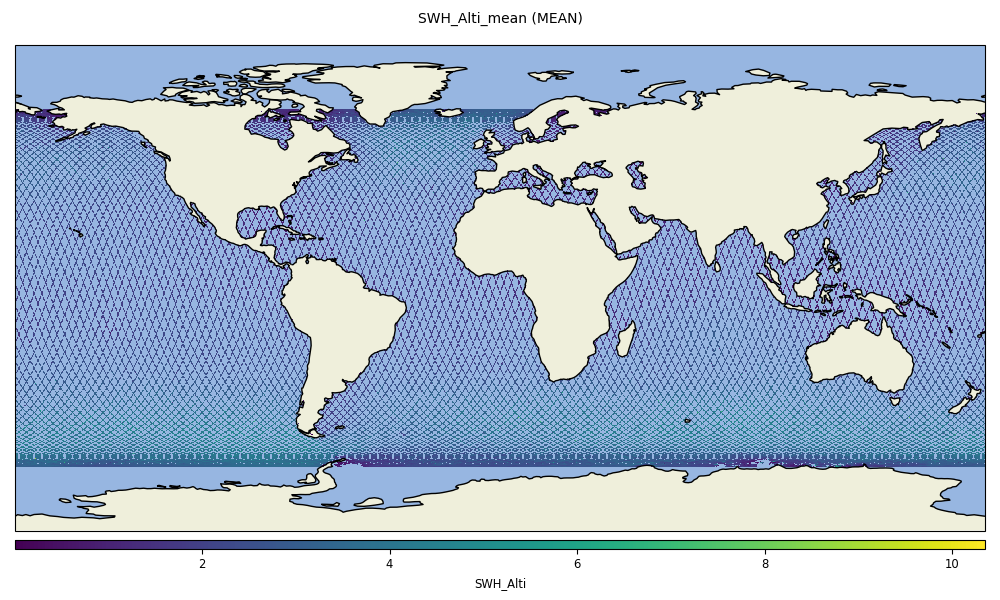

In [18]:
ad.add_geobox_stat(
    name='SWH_Alti_mean',
    field=swh_alti,
    stats=['mean'],
    res_lon=(-180.0, 180.0, 0.25),
    res_lat=(-90.0, 90.0, 0.25),
)

ad.compute()

plot = CasysPlot(
    data=ad,
    data_name='SWH_Alti_mean',
    stat='mean',
)
plot.show()


## Création du dataframe contenant les données standardisées

In [63]:
import pandas as pd
import xarray as xr
from sklearn.preprocessing import StandardScaler

In [64]:
ds = ad.data
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                    (time: 19664360)
Coordinates:
  * time                                       (time) datetime64[ns] 157MB 20...
Data variables:
    LONGITUDE                                  (time) float64 157MB 77.98 ......
    LATITUDE                                   (time) float64 157MB -66.14 .....
    SSH_anomaly_uncorrected_ssb                (time) float64 157MB -0.0665 ....
    SSH_anomaly_corrected_ssb                  (time) float64 157MB -0.0433 ....
    Orbital_velocity_std                       (time) float64 157MB 0.06614 ....
    Stokes_Drifts_prof_on_Satellite_Direction  (time) float64 157MB 0.01105 ....
    Mean_Wave_Period                           (time) float64 157MB 7.224 ......
    Wind_Speed_Alti                            (time) float64 157MB 1.3 ... 1...
    SWH_Alti                                   (time) float64 157MB 0.803 ......

In [65]:
results = []

for var_name in ds.data_vars:
    variable = ds[var_name]

    nombre_total_elements = variable.size
    nombre_de_nan = variable.isnull().sum()
    pourcentage_de_nan = (nombre_de_nan / nombre_total_elements) * 100

    results.append(
        [
            var_name,
            nombre_total_elements,
            nombre_de_nan.values,
            pourcentage_de_nan.values,
        ]
    )

df_stat = pd.DataFrame(
    results,
    columns=[
        "Variable",
        "Nombre total d'éléments",
        "Nombre de NaN",
        "Pourcentage de NaN",
    ],
)
df_stat

,Variable,Nombre total d'éléments,Nombre de NaN,Pourcentage de NaN
0,LONGITUDE,19664360,0,0.0
1,LATITUDE,19664360,0,0.0
2,SSH_anomaly_uncorrected_ssb,19664360,197137,1.0025091078479036
3,SSH_anomaly_corrected_ssb,19664360,145366,0.7392358561377029
4,Orbital_velocity_std,19664360,8607,0.04376954042745352
5,Stokes_Drifts_prof_on_Satellite_Direction,19664360,8607,0.04376954042745352
6,Mean_Wave_Period,19664360,144972,0.7372322313057735
7,Wind_Speed_Alti,19664360,0,0.0
8,SWH_Alti,19664360,0,0.0


In [66]:
ds = ds.dropna(dim="time")
ds

<xarray.Dataset> Size: 2GB
Dimensions:                                    (time: 19460857)
Coordinates:
  * time                                       (time) datetime64[ns] 156MB 20...
Data variables:
    LONGITUDE                                  (time) float64 156MB 77.98 ......
    LATITUDE                                   (time) float64 156MB -66.14 .....
    SSH_anomaly_uncorrected_ssb                (time) float64 156MB -0.0665 ....
    SSH_anomaly_corrected_ssb                  (time) float64 156MB -0.0433 ....
    Orbital_velocity_std                       (time) float64 156MB 0.06614 ....
    Stokes_Drifts_prof_on_Satellite_Direction  (time) float64 156MB 0.01105 ....
    Mean_Wave_Period                           (time) float64 156MB 7.224 ......
    Wind_Speed_Alti                            (time) float64 156MB 1.3 ... 1...
    SWH_Alti                                   (time) float64 156MB 0.803 ......

In [67]:
# Enragistrer le dataset xarray avec les longitudes latitudes
ds.to_netcdf("dataset3_2022_5var_lon_lat")

In [68]:
ds = ds.drop_vars(["LONGITUDE", "LATITUDE"])
ds

<xarray.Dataset> Size: 1GB
Dimensions:                                    (time: 19460857)
Coordinates:
  * time                                       (time) datetime64[ns] 156MB 20...
Data variables:
    SSH_anomaly_uncorrected_ssb                (time) float64 156MB -0.0665 ....
    SSH_anomaly_corrected_ssb                  (time) float64 156MB -0.0433 ....
    Orbital_velocity_std                       (time) float64 156MB 0.06614 ....
    Stokes_Drifts_prof_on_Satellite_Direction  (time) float64 156MB 0.01105 ....
    Mean_Wave_Period                           (time) float64 156MB 7.224 ......
    Wind_Speed_Alti                            (time) float64 156MB 1.3 ... 1...
    SWH_Alti                                   (time) float64 156MB 0.803 ......

In [70]:
# Enragistrer le dataset xarray
ds.to_netcdf("dataset3_2022_5var")

In [71]:
ds = xr.open_dataset("dataset3_2022_5var")
df = ds.to_dataframe()
df

,SSH_anomaly_uncorrected_ssb,SSH_anomaly_corrected_ssb,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
time,,,,,,,
2022-01-01 00:38:31,-0.0665,-0.0433,0.066135,0.011054,7.2242,1.30,0.803
2022-01-01 00:38:32,-0.0489,-0.0347,0.066018,0.009237,7.2273,2.03,0.932
2022-01-01 00:38:33,-0.0695,-0.0493,0.065943,0.007333,7.2002,1.49,0.748
2022-01-01 00:38:34,-0.0698,-0.0436,0.065866,0.005443,7.2036,0.72,0.960
2022-01-01 00:38:35,-0.0481,-0.0295,0.065785,0.003567,7.2108,0.93,0.751
...,...,...,...,...,...,...,...
2022-12-31 23:43:01,0.0543,0.1271,0.101902,-0.147932,4.0907,11.98,1.496
2022-12-31 23:43:02,0.0492,0.1132,0.100604,-0.145296,4.0216,11.30,1.490
2022-12-31 23:43:03,0.0356,0.1013,0.099173,-0.142354,3.9822,11.67,1.389


In [72]:
df.to_csv("dataset3_2022_5var_df")

In [73]:
df.describe()

,SSH_anomaly_uncorrected_ssb,SSH_anomaly_corrected_ssb,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
count,1.946086e+07,1.946086e+07,1.946086e+07,1.946086e+07,1.946086e+07,1.946086e+07,1.946086e+07
mean,-7.534739e-02,3.660124e-02,1.011134e-01,2.310916e-02,6.736375e+00,8.306862e+00,2.689881e+00
std,1.297405e-01,1.142880e-01,3.645320e-02,9.937964e-02,1.468816e+00,3.752929e+00,1.405241e+00
min,-2.321400e+00,-1.999000e+00,8.326844e-03,-7.968588e-01,1.359400e+00,0.000000e+00,0.000000e+00
25%,-1.405000e-01,-1.510000e-02,7.477406e-02,-3.561422e-02,5.756200e+00,5.700000e+00,1.717000e+00
50%,-7.070000e-02,3.590000e-02,9.550902e-02,9.206190e-03,6.637800e+00,7.940000e+00,2.370000e+00
75%,-5.200000e-03,9.020000e-02,1.221567e-01,7.511071e-02,7.679000e+00,1.038000e+01,3.386000e+00
max,1.895800e+00,1.976200e+00,3.197326e-01,8.205035e-01,1.606040e+01,2.659000e+01,1.099700e+01


In [74]:
# Standardisation des données
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_scaled

,SSH_anomaly_uncorrected_ssb,SSH_anomaly_corrected_ssb,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
0,0.068193,-0.699122,-0.959530,-0.121300,0.332122,-1.867039,-1.342746
1,0.203848,-0.623873,-0.962752,-0.139585,0.334232,-1.672524,-1.250946
2,0.045070,-0.751621,-0.964798,-0.158742,0.315782,-1.816411,-1.381885
3,0.042758,-0.701747,-0.966927,-0.177762,0.318097,-2.021584,-1.231021
4,0.210015,-0.578374,-0.969148,-0.196638,0.322999,-1.965628,-1.379750
...,...,...,...,...,...,...,...
19460852,0.999283,0.791848,0.021636,-1.721084,-1.801229,0.978739,-0.849592
19460853,0.959973,0.670226,-0.013983,-1.694569,-1.848274,0.797547,-0.853861
19460854,0.855149,0.566103,-0.053243,-1.664956,-1.875098,0.896137,-0.925735
19460855,0.916040,0.573978,-0.078902,-1.647603,-1.895183,0.805541,-0.952065


In [75]:
# Enragistrer le dataset xarray
df_scaled.to_csv("dataset3_2022_5var_scaled")

## Analyse en Composantes Principales (ACP)

In [19]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("dataset3_2022_5var_scaled", index_col=0)

In [ ]:
df_x = df.drop(["SSH_anomaly_corrected_ssb", "SSH_anomaly_uncorrected_ssb"], axis=1)
df_x

In [ ]:
# Appliquer l'ACP
pca = PCA(
    n_components=2
)  # ou un autre nombre de composantes principales que  vous souhaitez conserver
principal_components = pca.fit_transform(df_x)

# Convertir les composantes principales en un DataFrame pour une manipulation plus facile
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

In [ ]:
# Appliquer l'ACP
pca = PCA()
principal_components = pca.fit_transform(df_x)

# Calcul des valeurs propres
eigval = pca.explained_variance_
print(eigval)

**3 méthodes pour déterminer le nombre de composantes principales à choisir :**

1. **Méthode du coude** :
La méthode du coude consiste à tracer le pourcentage de variance expliquée par chaque composante principale et à identifier le point où l'ajout de composantes supplémentaires n'apporte pas beaucoup plus d'information.
   - **Avantages** : Simple à interpréter + Peut être utilisé pour des ensembles de données de différentes dimensions.
   - **Inconvénients** : Parfois difficile à identifier le point exact du coude.

2. **Méthode du seuil de la variance expliquée** :
Cette méthode consiste à définir un seuil pour le pourcentage de variance expliquée que vous souhaitez atteindre (par exemple, 90% ou 95%) et à sélectionner le nombre de composantes nécessaires pour atteindre ou dépasser ce seuil.
   - **Avantages** : Permet de fixer un objectif spécifique pour la quantité de variance à expliquer.
   - **Inconvénients** : Le choix du seuil peut être subjectif + Ne fonctionne pas aussi bien pour les ensembles de données de dimensions très différentes.

3. **Analyse de Scree** :
L'analyse de Scree implique de tracer le pourcentage de variance expliquée par chaque composante principale. Si vous voyez une forte chute des pourcentages de variance après une certaine composante principale, vous pouvez choisir ce nombre de composantes avant la chute.
   - **Avantages** : Permet de visualiser graphiquement les baisses significatives de la variance expliquée.
   - **Inconvénients** : Nécessite une interprétation subjective de la courbe. de la variance expliquée.

In [ ]:
def choose_number_of_components(x_scaled, threshold=0.90):
    """
    Applique l'ACP sur les données standardisées, affiche les graphiques de variance expliquée et
    détermine le nombre de composantes nécessaires pour atteindre un seuil de variance expliquée cumulative.

    :param x_scaled: Données standardisées.
    :param threshold: Seuil de variance expliquée cumulative à atteindre.
    """
    # Appliquer l'ACP
    pca = PCA()
    pca.fit(x_scaled)

    # Variance expliquée cumulative
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Méthode du coude pour l'ACP
    plt.figure(figsize=(10, 5))
    plt.plot(cumulative_variance_ratio, marker="o")
    plt.xlabel("Nombre de composantes principales")
    plt.ylabel("Variance expliquée cumulative")
    plt.title("Méthode du coude pour l'ACP")
    plt.axhline(y=threshold, color="r", linestyle="--")
    plt.axvline(
        x=np.argmax(cumulative_variance_ratio >= threshold),
        color="r",
        linestyle="--",
    )
    plt.show()

    # Nombre de composantes pour atteindre ou dépasser le seuil
    num_components_threshold = np.argmax(cumulative_variance_ratio >= threshold)
    print(
        "Nombre de composantes pour atteindre ou dépasser le seuil de variance expliquée de",
        threshold,
        ":",
        num_components_threshold,
    )

    # Analyse de Scree
    plt.figure(figsize=(10, 5))
    plt.plot(
        range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_,
        marker="o",
        linestyle="-",
    )
    plt.title("Analyse de Scree")
    plt.xlabel("Composante principale")
    plt.ylabel("Pourcentage de variance expliquée")
    plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
    plt.grid(True)
    plt.show()

    return num_components_threshold

In [ ]:
num_components = choose_number_of_components(df_x, threshold=0.90)

In [ ]:
def apply_pca_and_identify_key_features(x_scaled, n_components):
    """
    Applique la PCA sur les données standardisées,
    et identifie les variables qui contribuent le plus à chaque composante principale.

    :param x_scaled: Données standardisées.
    :param n_components: Nombre de composantes principales à retenir.
    :return: Tuple contenant la matrice des chargements et la liste des variables clés pour chaque PC.
    """
    # Effectuer la PCA sur les données standardisées
    pca = PCA(n_components=n_components)
    pca.fit_transform(x_scaled)

    # Chargements des composantes principales
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Créer la matrice des chargements
    loading_matrix = pd.DataFrame(
        loadings,
        columns=[f"PC{i+1}" for i in range(n_components)],
        index=x_scaled.columns,
    )

    # Identifier les variables clés pour chaque composante principale
    key_features_per_pc = {}
    for i in range(n_components):
        pc = f"PC{i+1}"
        # Trier les chargements pour la i-ème composante principale par valeur absolue et prendre les 5 premiers
        sorted_features = loading_matrix[pc].abs().sort_values(ascending=False).head(5)
        key_features_per_pc[pc] = sorted_features.index.tolist()

    return loading_matrix, key_features_per_pc

In [ ]:
n_components = 2
loading_matrix, key_features_per_pc = apply_pca_and_identify_key_features(
    df_x, n_components
)
print(key_features_per_pc)
loading_matrix

In [ ]:
# Appliquer l'ACP
pca = PCA(n_components=4)
principal_components = pca.fit_transform(df_x)

explained_variance = pca.explained_variance_
pd.DataFrame(
    {
        "Explained Variance": explained_variance,
        "Explained Variance Ratio": pca.explained_variance_ratio_,
    },
    index=["PC1", "PC2", "PC3", "PC4"],
)

In [ ]:
print("\nLoadings:")
eigenvectors = pca.components_
loadings = eigenvectors.T * np.sqrt(explained_variance)
pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4"], index=df_x.columns)

In [ ]:
def biplot_2d_pca(x_scaled, feature_names):
    """
    Génère un biplot 2D pour une PCA sur des données standardisées.

    :param x_scaled: Données standardisées (numpy.ndarray).
    :param feature_names: Noms des caractéristiques (variables) des données (list).
    """
    # Effectuer la PCA
    pca = PCA(n_components=2)  # Utilisation de 2 composantes principales
    pca_result = pca.fit_transform(x_scaled)

    # Obtenir les chargements pour les deux composantes principales
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Créer le biplot
    plt.figure(figsize=(10, 7))
    # plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='blue')

    # Ajouter les vecteurs de chargement
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color="red", alpha=0.5)
        plt.text(
            loadings[i, 0] * 1.15,
            loadings[i, 1] * 1.15,
            feature,
            color="green",
            ha="center",
            va="center",
        )

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("2D PCA Biplot")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

In [ ]:
biplot_2d_pca(df_x, feature_names=df_x.columns)

## PLS

In [76]:
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv("dataset3_2022_5var_df", index_col=0)
df

,SSH_anomaly_uncorrected_ssb,SSH_anomaly_corrected_ssb,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
time,,,,,,,
2022-01-01 00:38:31,-0.0665,-0.0433,0.066135,0.011054,7.2242,1.30,0.803
2022-01-01 00:38:32,-0.0489,-0.0347,0.066018,0.009237,7.2273,2.03,0.932
2022-01-01 00:38:33,-0.0695,-0.0493,0.065943,0.007333,7.2002,1.49,0.748
2022-01-01 00:38:34,-0.0698,-0.0436,0.065866,0.005443,7.2036,0.72,0.960
2022-01-01 00:38:35,-0.0481,-0.0295,0.065785,0.003567,7.2108,0.93,0.751
...,...,...,...,...,...,...,...
2022-12-31 23:43:01,0.0543,0.1271,0.101902,-0.147932,4.0907,11.98,1.496
2022-12-31 23:43:02,0.0492,0.1132,0.100604,-0.145296,4.0216,11.30,1.490
2022-12-31 23:43:03,0.0356,0.1013,0.099173,-0.142354,3.9822,11.67,1.389


In [100]:
df = df.reset_index(drop=True)
df

,SSH_anomaly_uncorrected_ssb,SSH_anomaly_corrected_ssb,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
0,-0.0665,-0.0433,0.066135,0.011054,7.2242,1.30,0.803
1,-0.0489,-0.0347,0.066018,0.009237,7.2273,2.03,0.932
2,-0.0695,-0.0493,0.065943,0.007333,7.2002,1.49,0.748
3,-0.0698,-0.0436,0.065866,0.005443,7.2036,0.72,0.960
4,-0.0481,-0.0295,0.065785,0.003567,7.2108,0.93,0.751
...,...,...,...,...,...,...,...
19460852,0.0543,0.1271,0.101902,-0.147932,4.0907,11.98,1.496
19460853,0.0492,0.1132,0.100604,-0.145296,4.0216,11.30,1.490
19460854,0.0356,0.1013,0.099173,-0.142354,3.9822,11.67,1.389
19460855,0.0435,0.1022,0.098237,-0.140629,3.9527,11.33,1.352


In [101]:
df_x = df.drop(["SSH_anomaly_corrected_ssb", "SSH_anomaly_uncorrected_ssb"], axis=1)
df_x

,Orbital_velocity_std,Stokes_Drifts_prof_on_Satellite_Direction,Mean_Wave_Period,Wind_Speed_Alti,SWH_Alti
0,0.066135,0.011054,7.2242,1.30,0.803
1,0.066018,0.009237,7.2273,2.03,0.932
2,0.065943,0.007333,7.2002,1.49,0.748
3,0.065866,0.005443,7.2036,0.72,0.960
4,0.065785,0.003567,7.2108,0.93,0.751
...,...,...,...,...,...
19460852,0.101902,-0.147932,4.0907,11.98,1.496
19460853,0.100604,-0.145296,4.0216,11.30,1.490
19460854,0.099173,-0.142354,3.9822,11.67,1.389
19460855,0.098237,-0.140629,3.9527,11.33,1.352


In [102]:
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x)

In [103]:
df_y = df[["SSH_anomaly_uncorrected_ssb"]]
df_y

,SSH_anomaly_uncorrected_ssb
0,-0.0665
1,-0.0489
2,-0.0695
3,-0.0698
4,-0.0481
...,...
19460852,0.0543
19460853,0.0492
19460854,0.0356
19460855,0.0435


In [ ]:
#scaler_y = StandardScaler()
#df_x_scaled = scaler_y.fit_transform(df_y)

In [104]:
df_y_bis = df[["SSH_anomaly_corrected_ssb"]]
df_y_bis

,SSH_anomaly_corrected_ssb
0,-0.0433
1,-0.0347
2,-0.0493
3,-0.0436
4,-0.0295
...,...
19460852,0.1271
19460853,0.1132
19460854,0.1013
19460855,0.1022


In [108]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    df_x_scaled, df_y_bis, test_size=0.2, random_state=42
)

In [109]:
# Définir le modèle PLS avec un certain nombre de composantes
pls = PLSRegression(n_components=2)

# Entraîner le modèle sur les données d'entraînement
pls.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = pls.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Vous pouvez également examiner les composantes PLS pour l'interprétation
print("Composantes PLS pour X:", pls.x_weights_.shape)
print("Composantes PLS pour Y:", pls.y_weights_.shape)

MSE: 0.012881170344869694
Composantes PLS pour X: (5, 2)
Composantes PLS pour Y: (1, 2)


In [110]:
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.012881170344869694
R^2: 0.01144380135215095


In [111]:
scores = pls.x_scores_  # Scores des échantillons
loadings = pls.x_loadings_  # Loadings des variables

# Créer la matrice des chargements
loading_matrix = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(2)],
    index=df_x.columns,
)


In [112]:
loading_matrix

,PC1,PC2
Orbital_velocity_std,0.543409,0.179995
Stokes_Drifts_prof_on_Satellite_Direction,0.359717,-1.092440
Mean_Wave_Period,0.308353,0.772731
Wind_Speed_Alti,0.477568,0.180060
SWH_Alti,0.539133,0.309987


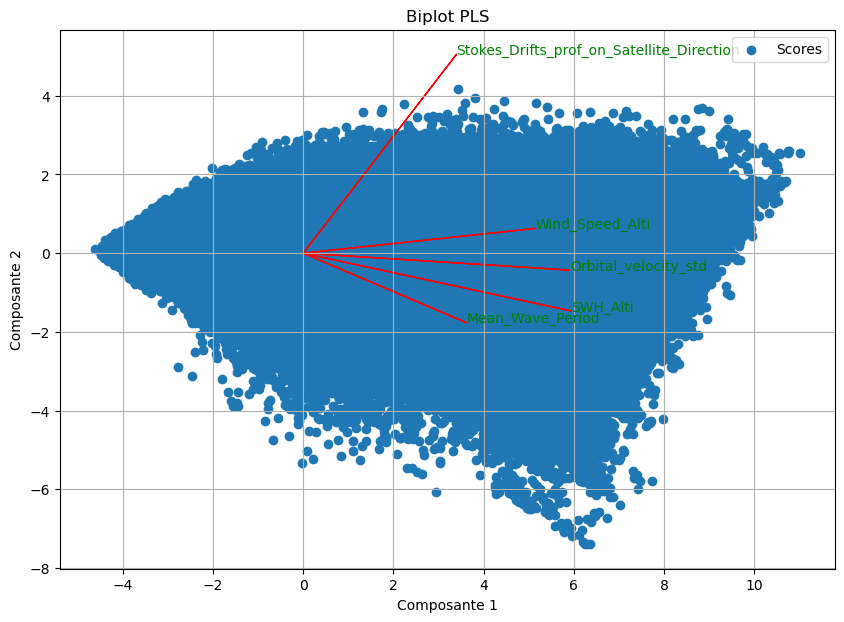

In [40]:
import matplotlib.pyplot as plt

# Création du biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Ajout des scores
ax.scatter(scores[:, 0], scores[:, 1], label='Scores')

# Ajout des loadings
for i, txt in enumerate(df_x.columns):
    ax.arrow(0, 0, loadings[i, 0]*max(scores[:,0]), loadings[i, 1]*max(scores[:,1]), color='r')
    ax.text(loadings[i, 0]*max(scores[:,0]), loadings[i, 1]*max(scores[:,1]), txt, color='g')

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_title('Biplot PLS')
ax.legend()
plt.grid(True)
plt.show()


2024-08-31 20:06:19 WARNING No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


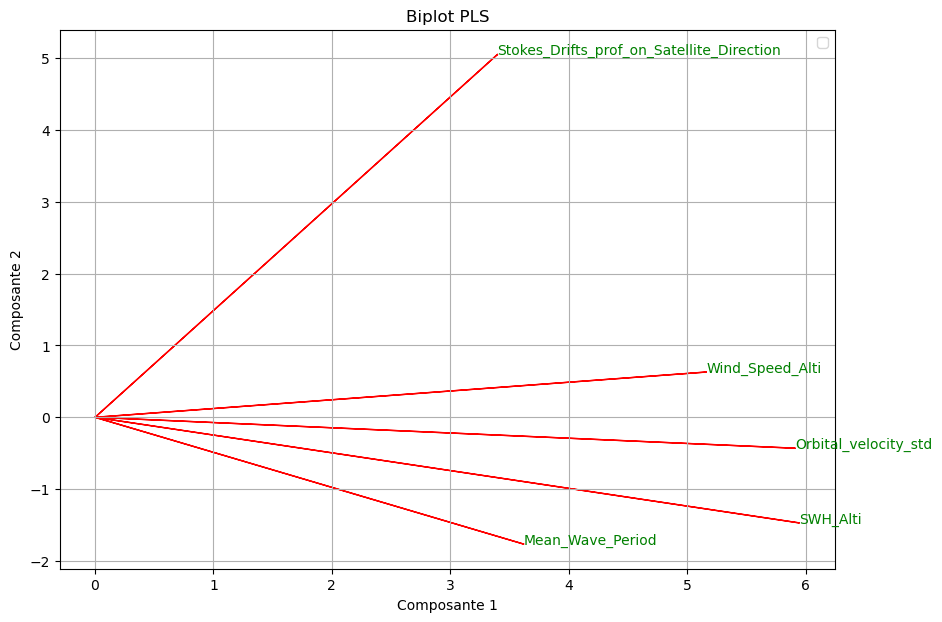

In [41]:
import matplotlib.pyplot as plt

# Création du biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Ajout des scores
#ax.scatter(scores[:, 0], scores[:, 1], label='Scores')

# Ajout des loadings
for i, txt in enumerate(df_x.columns):
    ax.arrow(0, 0, loadings[i, 0]*max(scores[:,0]), loadings[i, 1]*max(scores[:,1]), color='r')
    ax.text(loadings[i, 0]*max(scores[:,0]), loadings[i, 1]*max(scores[:,1]), txt, color='g')

ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_title('Biplot PLS')
ax.legend()
plt.grid(True)
plt.show()
